In [17]:
!apt-get update
!apt-get install -y tesseract-ocr


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

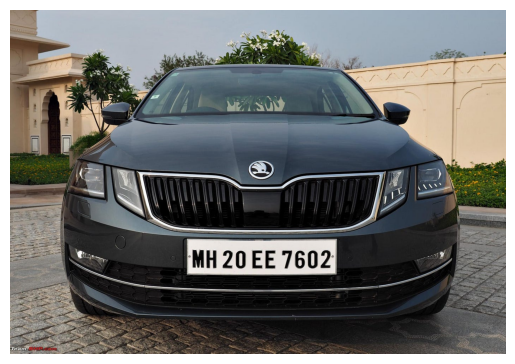

Detected Plate Number: MH 20 EE 7602


In [18]:
import cv2
import pytesseract

# Path to tesseract executable
pytesseract.pytesseract.tesseract_cmd = "/usr/bin/tesseract"

def detect_plate_number(image_path):
    # Load the image
    image = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to remove noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Edge detection (Canny) to highlight plate contours
    edges = cv2.Canny(blurred, 100, 200)

    # Find contours to locate the license plate
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sort contours based on area (descending order)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    plate_contour = None
    for contour in contours:
        # Approximate the contour to a polygon
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # Check if the contour has 4 vertices (which may be a rectangle, typical for plates)
        if len(approx) == 4:
            plate_contour = approx
            break

    if plate_contour is not None:
        # Draw a bounding box around the detected license plate
        x, y, w, h = cv2.boundingRect(plate_contour)
        plate_image = gray[y:y + h, x:x + w]

        # Apply thresholding to binarize the plate area
        _, thresh = cv2.threshold(plate_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Perform OCR on the detected plate area
        plate_number = pytesseract.image_to_string(thresh, config='--psm 8')  # Treat it as a single word

        return plate_number.strip()
    else:
        return "License plate not detected"

# Provide the image path
image_path = "car.jpg"  # Replace with your image path

# Detect and print the plate number
plate_number = detect_plate_number(image_path)
print("Detected Plate Number:", plate_number)
